In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

FASE 1.- EXPLORACION Y LIMPIEZA DE DATOS:

In [2]:
df_customer_flight_activity = pd.read_csv("Customer Flight Activity.csv")

df_customer_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
df_customer_flight_activity.shape

(405624, 10)

In [4]:
df_customer_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
df_customer_flight_activity.isnull().sum() # no hay nulos

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [6]:
df_customer_flight_activity.duplicated().sum()

1864

In [7]:
df_customer_flight_activity[df_customer_flight_activity.duplicated()] # -> veo algunas de las filas duplicadas

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [8]:
df_customer_flight_activity[df_customer_flight_activity.duplicated(keep=False)] # -> si quiero incluir la fila original además del duplicado

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [9]:
duplicados = df_customer_flight_activity[df_customer_flight_activity.duplicated()] # creo una variable para mostrar cuáles son los duplicados
duplicados

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [10]:
df_customer_flight_activity_no_duplicados = df_customer_flight_activity.drop_duplicates(keep='first') # Elimino las filas duplicadas y conservo la primera aparición de cada registro
df_customer_flight_activity_no_duplicados

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [11]:
df_customer_flight_activity_no_duplicados.duplicated().sum() # Compruebo de que haya duplicados después de haberlos borrado

0

In [12]:
df_customer_flight_activity_definitivo = df_customer_flight_activity_no_duplicados # Cambio el nombre del DF para tener el inicial

In [13]:
df_customer_flight_activity_definitivo.duplicated().sum() 

0

In [14]:
df_customer_flight_activity_definitivo.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [15]:
df_customer_flight_activity_definitivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 33.9 MB


In [16]:
df_customer_flight_activity_definitivo.shape

(403760, 10)

In [17]:
df_customer_loyalty_history = pd.read_csv("Customer Loyalty History.csv")

df_customer_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [18]:
df_customer_loyalty_history.shape

(16737, 16)

In [19]:
df_customer_loyalty_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [20]:
df_customer_loyalty_history.isnull().sum() # Las columnas de Salary, Cancellation Year y Cancellation Month tienen valores nulos

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [21]:
(df_customer_loyalty_history.isnull().sum()/df_customer_loyalty_history.shape[0]*100) # Para comprobar el % de nulos

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [22]:
df_customer_loyalty_history.duplicated().sum()

0

In [23]:
df_customer_loyalty_history.describe().T # los datos de las columnas en las que hay nulos son de carácter numérico "Salary", "Cancellation Year" y "Cancellation Month" y el resto son de carácter categórico por lo que se sacaría poniendo describe(include="O").T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [24]:
# Valores nulos de la columna "Salary":



In [25]:
# df_customer_loyalty_history["Salary"].isnull().sum() # al devolver 0 significa que todos los valores nulos han sido reemplazados correctamente

In [26]:
# En "Salary", hay datos positivos y negativos, por lo que hay que convertir todos los valores negativos en su equivalente positivo -> abs

# df_customer_loyalty_history["Salary"] = df_customer_loyalty_history["Salary"].abs()

In [27]:
# (df_customer_loyalty_history["Salary"] < 0).sum() # verifico si quedan valores negativos y al ser 0, veo que no

In [28]:
# df_customer_loyalty_history.head()

In [29]:
# Valores nulos de las columnas "Cancellation Year" y "Cancellation Month"
# voy a convertir las columnas de "Cancellation Month" y "Cancellation Year" en una columna llamada "Cancellation Status":
def status_cancellation(df, columnas):
    for col in columnas:
        df[f'Cancellation Status'] = df[col].apply(lambda x: 'inactivo' if x == x else 'activo')
    return df

In [30]:
df_customer_loyalty_history = status_cancellation(df_customer_loyalty_history, ['Cancellation Month'])

In [31]:
df_customer_loyalty_history.head() # nos enseña que en los espacios de las columnas "Cancellation" los Nan es que sigue la membresía en activo y los inactivos es porque se dieron de baja en ese año y mes

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Cancellation Status
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,activo
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,inactivo
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,activo
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,activo


In [32]:
# comparacion_colum_educacion_salario = df_customer_loyalty_history[['Education', 'Salary']]
# comparacion_colum_educacion_salario

In [33]:
# Valores nulos de la columna "Salary": Voy a rellenar los valores nulos con la mediana que existe en la columna de "Education" porque todos los "Colleges" son los que salen nulos.
# Así mismo, metemos 'High School y Bachelor' porque son los valores que más se aproximarían al valor del salario de los colleges, los demás se alejan demasiado

mediana_salario = df_customer_loyalty_history[df_customer_loyalty_history['Education'].isin(['High School or Below', 'Bachelor'])]['Salary'].median()
mediana_salario 

70867.0

In [34]:
# Relleno los valores nulos de la columna 'Salary'
df_customer_loyalty_history['Salary'].fillna(mediana_salario, inplace=True)

In [35]:
df_customer_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Cancellation Status
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,70867.0,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,activo
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,70867.0,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,inactivo
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,70867.0,Single,Star,3839.75,Standard,2013,2,NaN,NaN,activo
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,activo


In [36]:
# Voy a combinar los dos datasets por medio de la columna loyalty number que es la columna que tienen ambos df en común
df_merged = df_customer_flight_activity.merge(df_customer_loyalty_history, on="Loyalty Number", how="outer") # con el outer para no perder datos

In [37]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [38]:
df_merged.sample(15)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Cancellation Status
240044,631714,2018,9,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Female,Doctor,154475.0,Married,Nova,26197.41,Standard,2012,7,NaN,NaN,activo
363960,906946,2017,1,3,0,3,426,42.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,52990.0,Married,Aurora,7388.18,Standard,2012,10,NaN,NaN,activo
125312,379281,2017,9,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,76300.0,Married,Nova,5498.75,Standard,2017,8,NaN,NaN,activo
197928,540142,2017,1,12,1,13,1976,197.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,College,70867.0,Single,Star,13883.33,Standard,2012,9,NaN,NaN,activo
113362,352101,2017,11,9,1,10,3330,333.0,0,0,Canada,Ontario,Toronto,P1W 1K4,Female,Bachelor,67445.0,Single,Nova,5015.01,Standard,2013,12,NaN,NaN,activo
304878,773397,2017,7,11,0,11,2354,235.0,0,0,Canada,Alberta,Calgary,T3E 2V9,Male,Bachelor,57150.0,Single,Star,6369.26,Standard,2013,5,NaN,NaN,activo
389406,963644,2017,6,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,70867.0,Single,Star,7215.82,Standard,2017,11,NaN,NaN,activo
310815,787472,2018,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2M 7K8,Female,College,70867.0,Single,Star,4506.66,Standard,2017,9,NaN,NaN,activo
47913,206366,2017,11,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Male,High School or Below,46991.0,Divorced,Nova,6317.37,Standard,2015,10,NaN,NaN,activo
234159,618022,2018,5,11,0,11,4147,414.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,53879.0,Married,Star,2560.69,Standard,2015,1,NaN,NaN,activo


FASE 2.- VISUALIZACION:

1. ¿Cómo se distribuye la cantidad de vuelos reservados ('Flights Booked') por mes ('Month') durante el año?

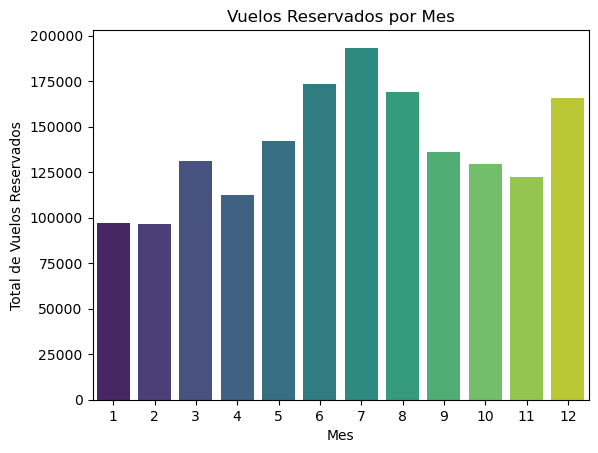

In [41]:
reservas_vuelos_mensual = df_merged.groupby('Month')['Flights Booked'].sum().reset_index()
sns.barplot(x='Month', y='Flights Booked', data=reservas_vuelos_mensual, palette='viridis')
plt.title('Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Vuelos Reservados');

Cada barra representa un mes y la altura de la barra representa el total de vuelos reservados durante ese mes. 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

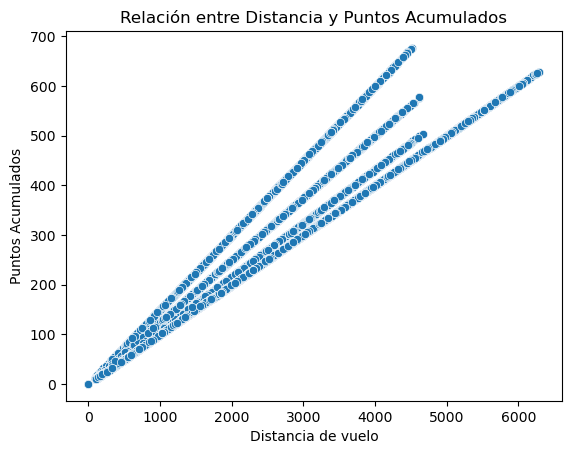

In [46]:
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_merged)
plt.title('Relación entre Distancia y Puntos Acumulados')
plt.xlabel('Distancia de vuelo')
plt.ylabel('Puntos Acumulados');

La relación que existe en este caso es positiva, ya que a mayor distancia de vuelo, mayor cantidad de puntos acumulados.